In [170]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
FILE_PATH_CSV_SCORES = './model3_final_scores.csv'

In [172]:
df_scores = pd.read_csv(FILE_PATH_CSV_SCORES,).reset_index().rename(columns={'index':'episode'})
df_scores.head()

,episode,Result,Castle_size,Steps,Invalid_steps
0,0,Lose,9,422,411
1,1,Lose,10,154,148
2,2,Lose,7,120,97
3,3,Lose,10,2718,2707
4,4,Lose,10,267,261


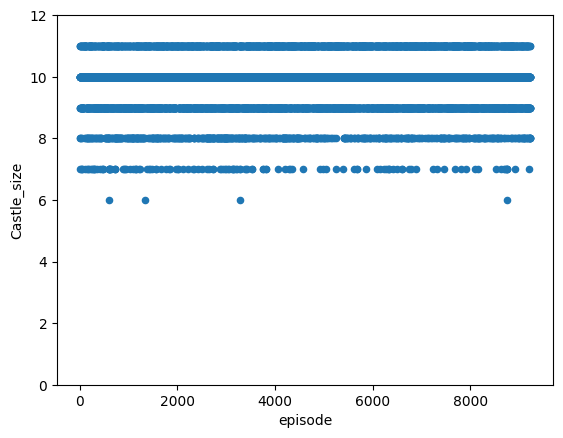

In [173]:
df_scores.plot(
    kind='scatter',
    x='episode',
    y='Castle_size',
)

plt.ylim((0,12))
plt.show()

In [174]:
best_castle = min(df_scores['Castle_size'])
df_scores.query(f'Castle_size == {best_castle}')

,episode,Result,Castle_size,Steps,Invalid_steps
610,610,Lose,6,623,602
1345,1345,Lose,6,258,238
3289,3289,Lose,6,89,66
8749,8749,Lose,6,201,178


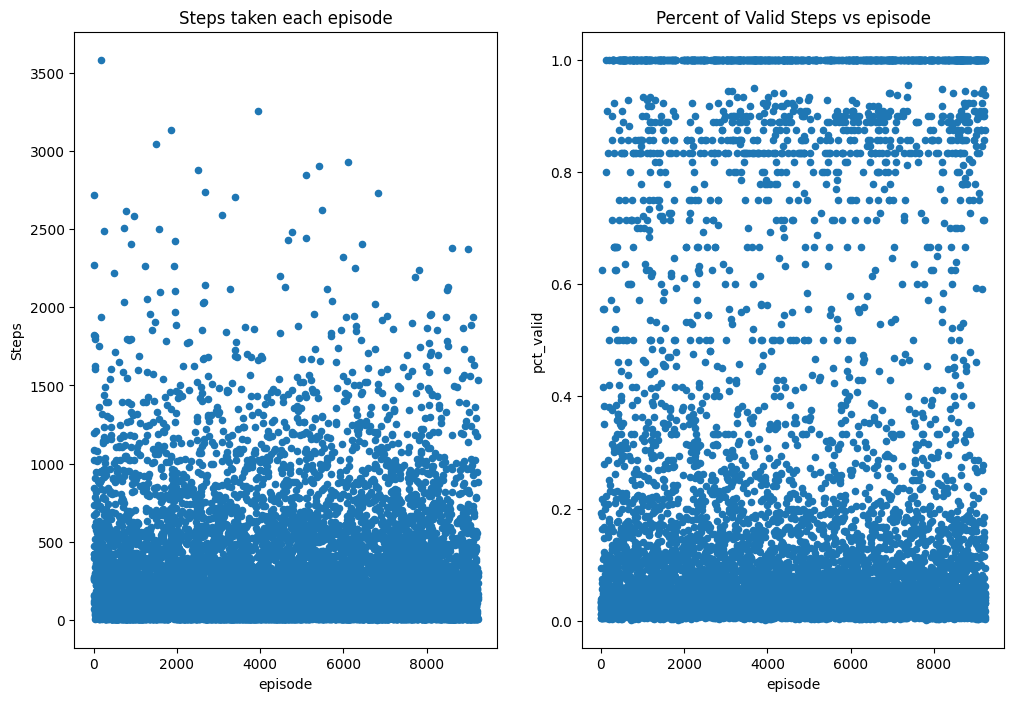

In [175]:
df_scores['pct_valid'] = (df_scores['Steps'] - df_scores['Invalid_steps']) / df_scores['Steps']
plt.figure(figsize=(12,8))
ax = plt.subplot(1,2,1)
df_scores.plot(
    kind='scatter',
    x='episode',
    y='Steps',
    title = 'Steps taken each episode',
    ax=ax,
)
ax = plt.subplot(1,2,2)
df_scores.plot(
    kind='scatter',
    x='episode',
    y='pct_valid',
    title = 'Percent of Valid Steps vs episode',
    ax=ax,
)
plt.show()

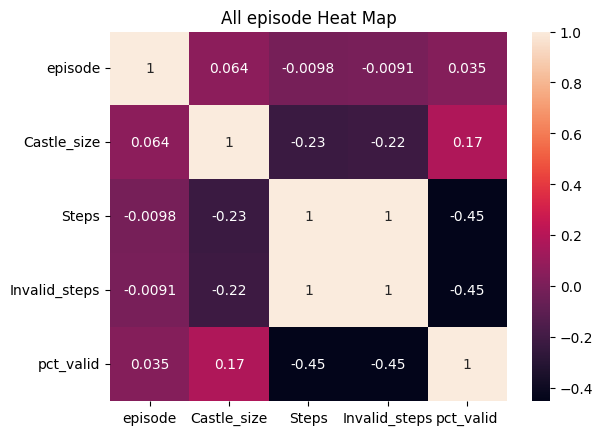

In [176]:
heat_data = df_scores.corr(numeric_only=True)
sns.heatmap(heat_data, annot=True)
plt.title('All episode Heat Map')
plt.show()

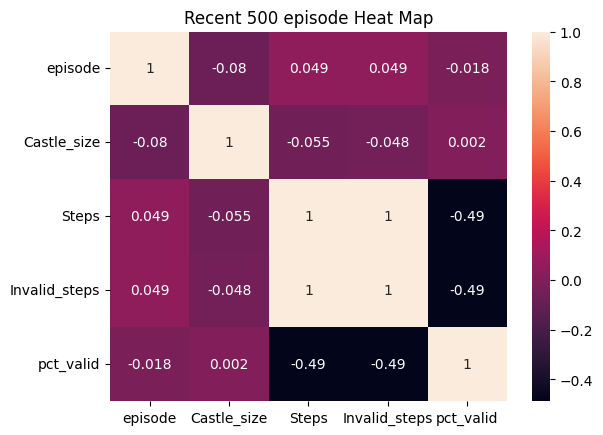

In [177]:
rolling_sample = 500
heat_data = df_scores.iloc[-rolling_sample:,:].corr(numeric_only=True)
sns.heatmap(heat_data, annot=True)
plt.title(f'Recent {rolling_sample} episode Heat Map')
plt.show()

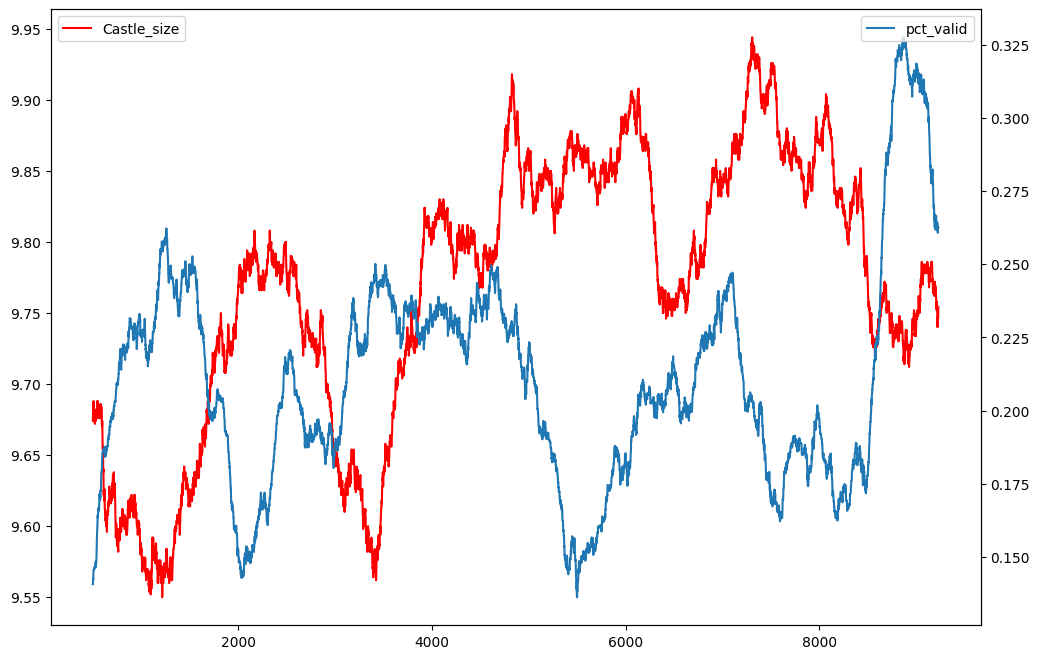

In [178]:
plt.figure(figsize=(12,8))
ax1 = plt.subplot()
df_scores['Castle_size'].rolling(rolling_sample).mean().plot(ax=ax1, color='Red',)
ax1.legend(loc='upper left')
ax2 = plt.twinx()
df_scores['pct_valid'].rolling(rolling_sample).mean().plot(ax=ax2,)
ax2.legend(loc=1)
plt.show()